# Algorithm Performance Data Analysis - Run 3

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## Run3 
data = pd.read_csv('IndividualCompressionData_since_test_20231031_152201.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_152201,10404007.png,502730,44612,458118,0.911261,31,18,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0001
1,2,test_20231031_152201,1254659.png,342646,104222,238424,0.695832,6,11,80080,14168,65912,0.823077,17.388292,2285.325643,14.541323,110,0.0001
2,3,test_20231031_152201,10188041.png,221231,13599,207632,0.938530,4,10,41731,1913,39818,0.954159,9.578884,813.111029,19.029305,110,0.0001
3,4,test_20231031_152201,10287332.png,216980,16302,200678,0.924869,3,7,22337,2218,20119,0.900703,8.782759,632.893397,20.117498,110,0.0001
4,5,test_20231031_152201,11610969.png,368720,42309,326411,0.885254,5,8,84111,6125,77986,0.927180,17.662498,2100.225157,14.908145,110,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,6,test_20231031_152709,10350842.png,212614,3027,209587,0.985763,4,9,42529,441,42088,0.989631,24.490901,3586.065931,12.584621,130,0.0014
2936,7,test_20231031_152709,10863862.png,317432,6597,310835,0.979218,2,6,66058,967,65091,0.985361,37.209481,6920.689093,9.729310,130,0.0014
2937,8,test_20231031_152709,11382381.png,312486,367,312119,0.998826,3,6,46745,48,46697,0.998973,23.287735,2886.242320,13.527476,130,0.0014
2938,9,test_20231031_152709,11079715.png,443815,107537,336278,0.757699,5,6,124136,15092,109044,0.878424,18.001861,2370.582107,14.382254,130,0.0014


## Analyze per Image

In [3]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [4]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_152201,10404007.png,502730,44612,458118,0.911261,31,18,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0001
10,1,test_20231031_152202,10404007.png,502730,44612,458118,0.911261,5,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0002
20,1,test_20231031_152204,10404007.png,502730,44612,458118,0.911261,7,11,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0003
30,1,test_20231031_152205,10404007.png,502730,44612,458118,0.911261,4,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0004
40,1,test_20231031_152206,10404007.png,502730,44612,458118,0.911261,4,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,1,test_20231031_152705,10404007.png,502730,14797,487933,0.970567,3,15,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.0010
2900,1,test_20231031_152706,10404007.png,502730,14797,487933,0.970567,3,6,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.0011
2910,1,test_20231031_152707,10404007.png,502730,14797,487933,0.970567,3,5,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.0012
2920,1,test_20231031_152708,10404007.png,502730,14797,487933,0.970567,3,6,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.0013


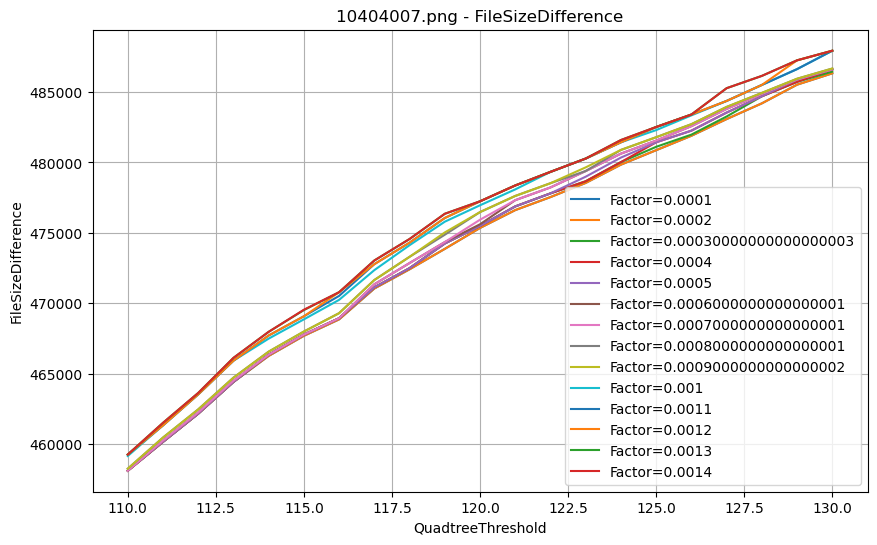

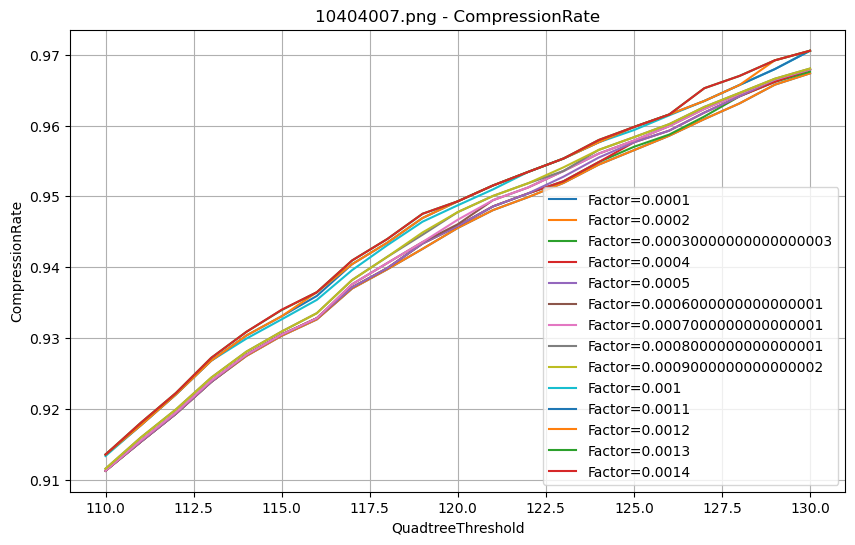

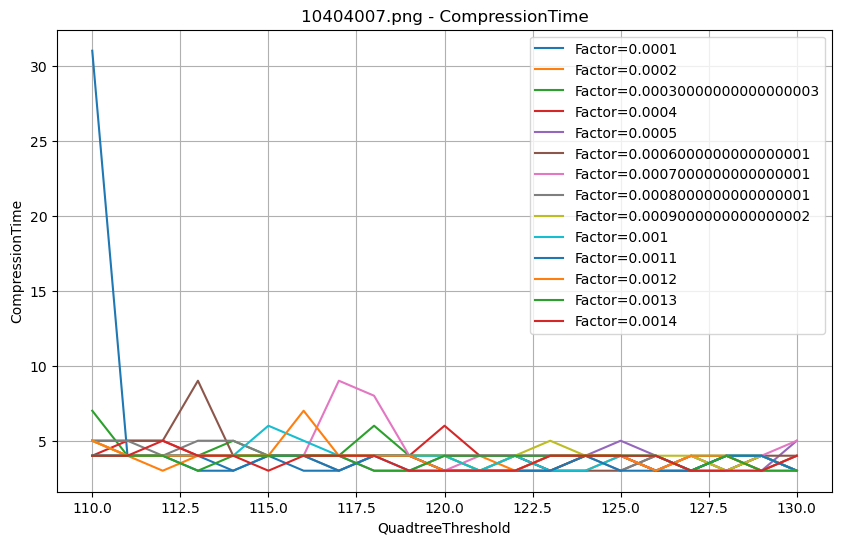

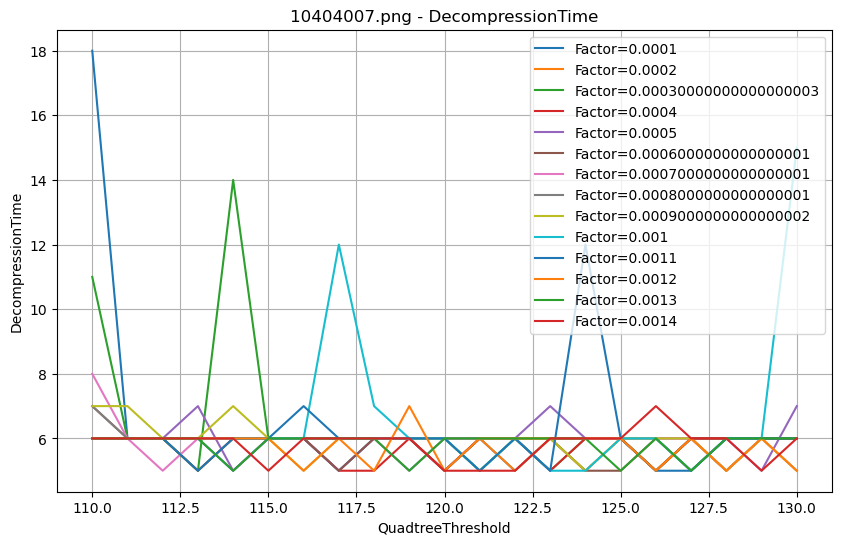

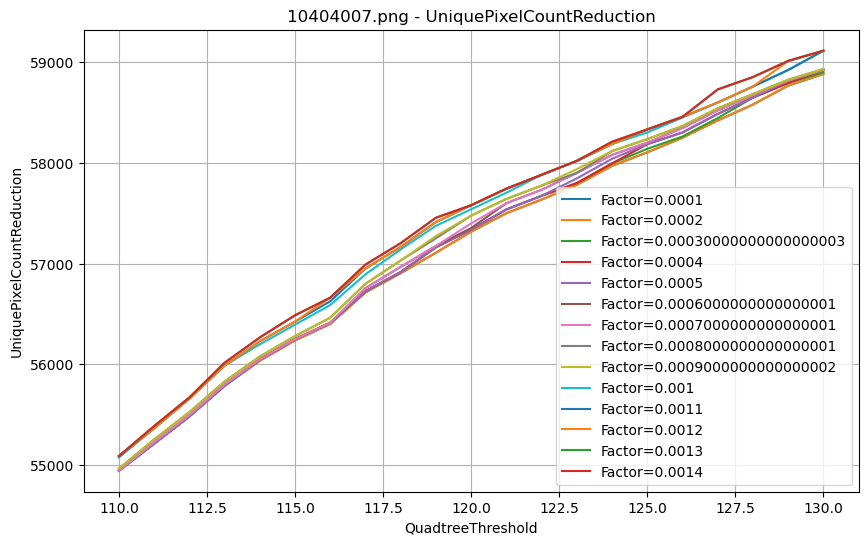

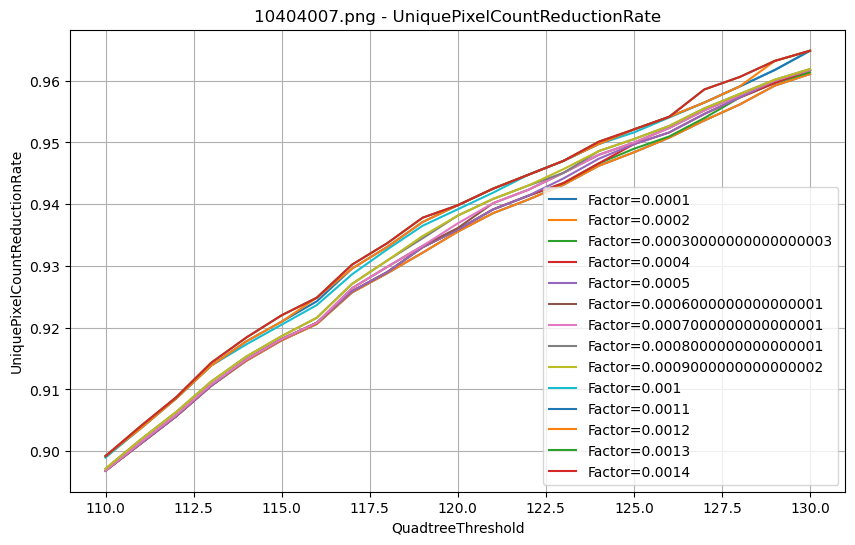

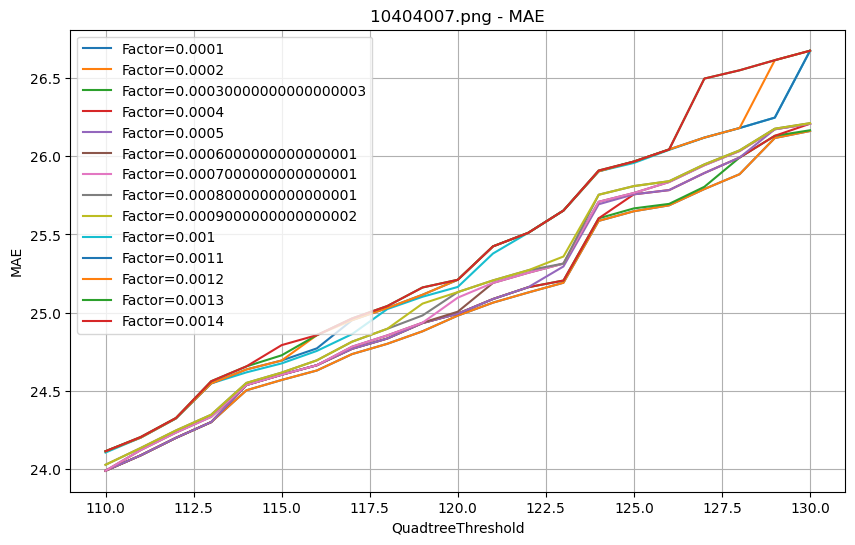

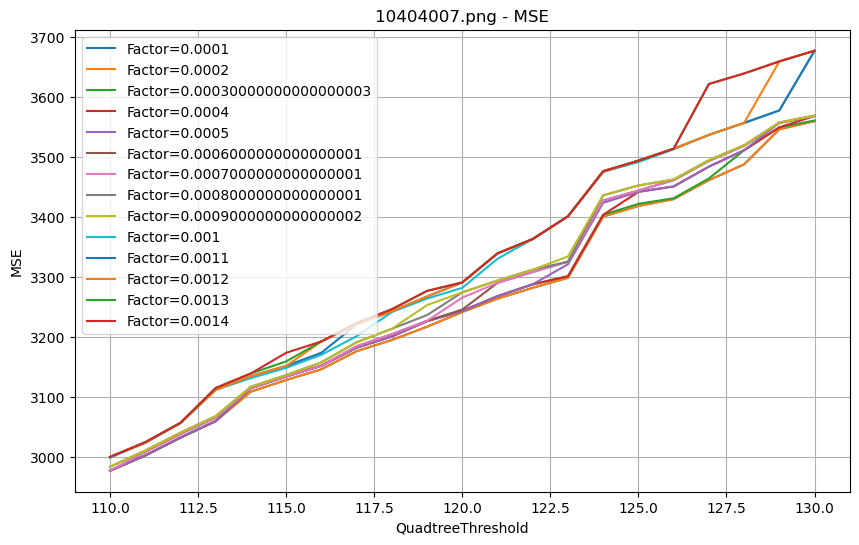

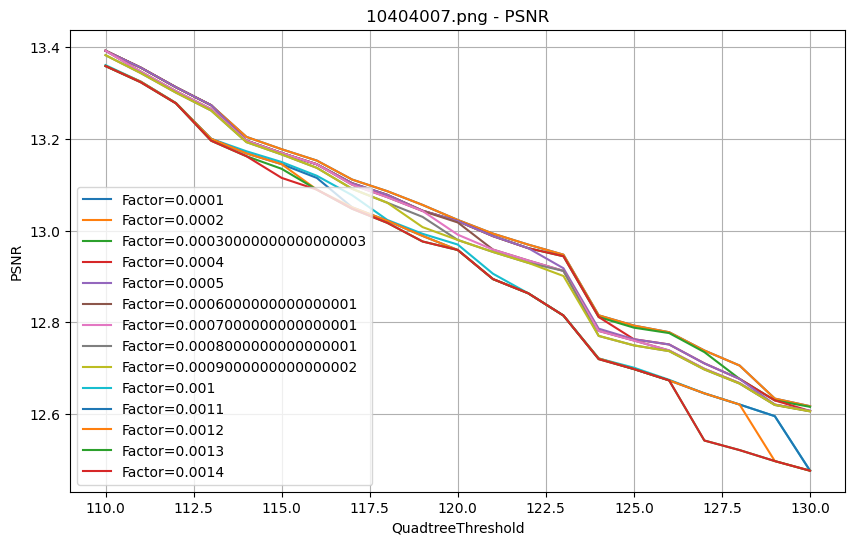

In [5]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [3]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_50568/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [7]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231031_152201,110,0.0001,5.5,321053.7,41595.1,279458.6,0.886417,7.4,9.8,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
1,test_20231031_152202,110,0.0002,5.5,321053.7,41538.8,279514.9,0.886642,5.4,8.7,60908.4,5768.3,55140.1,0.922962,16.228578,1783.266368,16.003473
2,test_20231031_152204,110,0.0003,5.5,321053.7,41488.5,279565.2,0.886824,4.0,6.4,60908.4,5761.8,55146.6,0.923093,16.301170,1792.919392,15.970324
3,test_20231031_152205,110,0.0004,5.5,321053.7,41458.0,279595.7,0.886921,5.0,7.6,60908.4,5757.3,55151.1,0.923189,16.370267,1804.431757,15.943065
4,test_20231031_152206,110,0.0005,5.5,321053.7,41423.0,279630.7,0.887033,3.8,6.3,60908.4,5752.3,55156.1,0.923296,16.420173,1812.351420,15.925259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,test_20231031_152705,130,0.0010,5.5,321053.7,23776.1,297277.6,0.935675,3.0,6.8,60908.4,3364.8,57543.6,0.956924,21.460160,3033.289519,13.907701
290,test_20231031_152706,130,0.0011,5.5,321053.7,23744.1,297309.6,0.935803,3.0,5.7,60908.4,3360.0,57548.4,0.957079,22.159342,3198.569254,13.635843
291,test_20231031_152707,130,0.0012,5.5,321053.7,23712.1,297341.6,0.935904,2.9,5.5,60908.4,3355.2,57553.2,0.957152,22.210009,3211.245227,13.627782
292,test_20231031_152708,130,0.0013,5.5,321053.7,23676.1,297377.6,0.936064,2.9,5.9,60908.4,3350.4,57558.0,0.957264,22.275550,3225.064259,13.593397


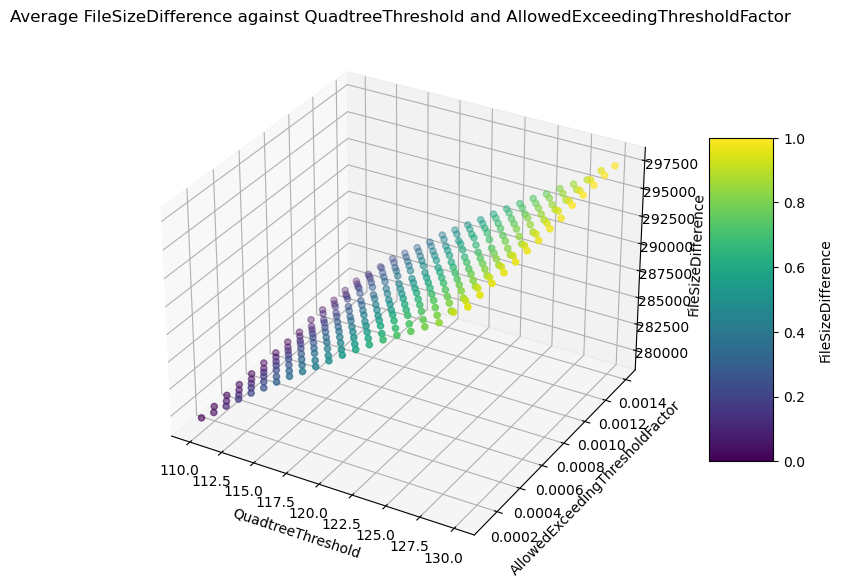

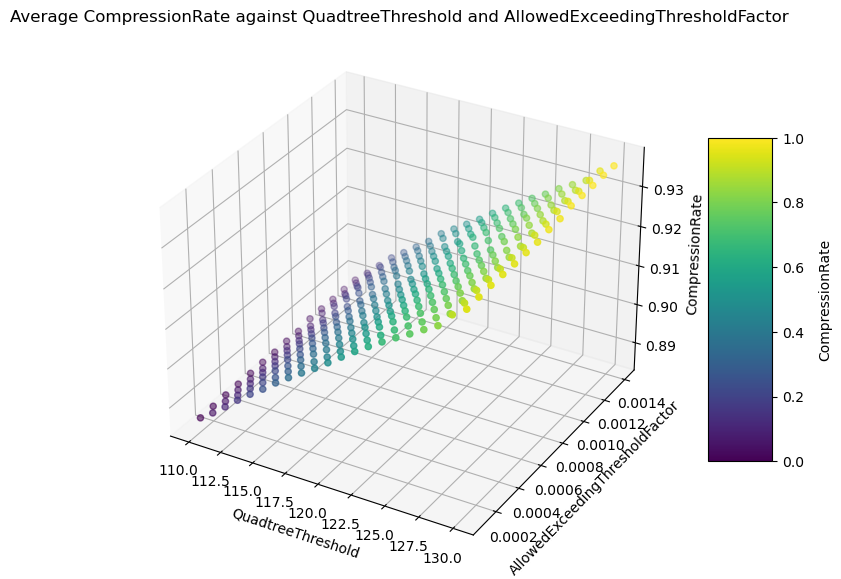

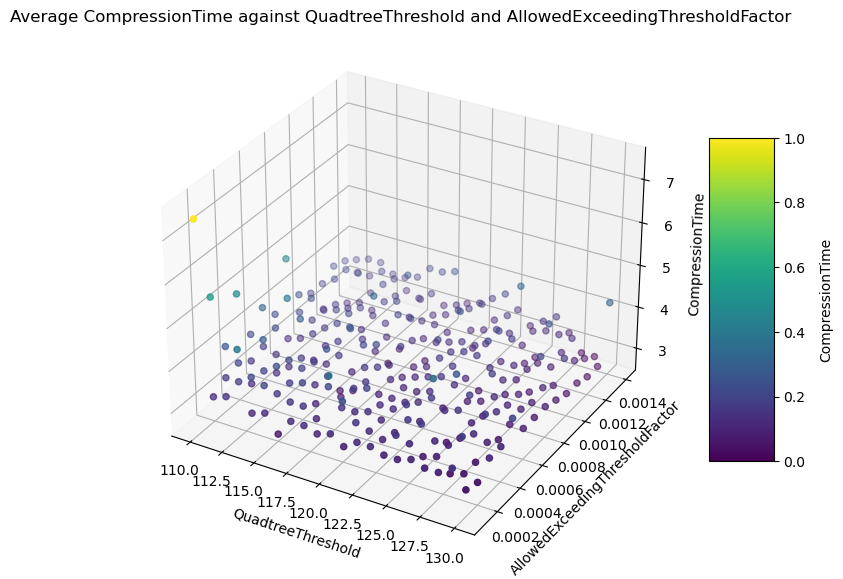

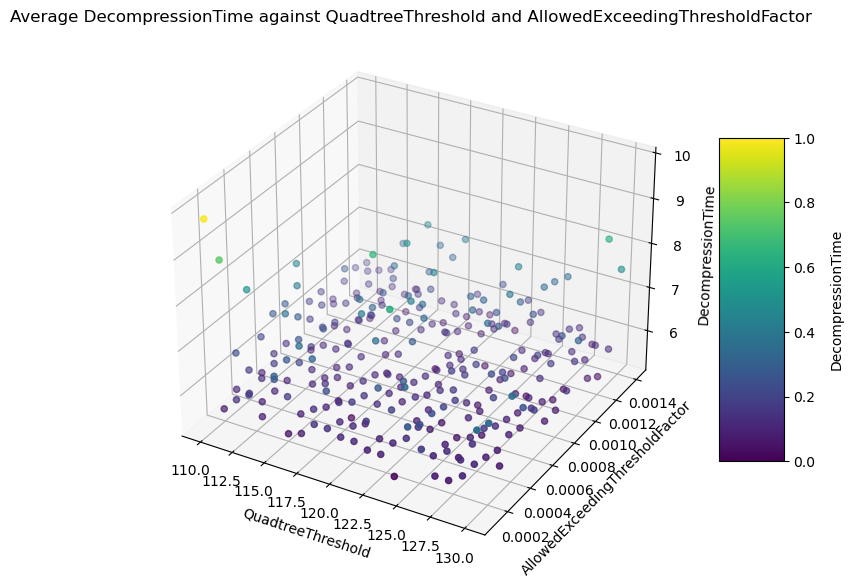

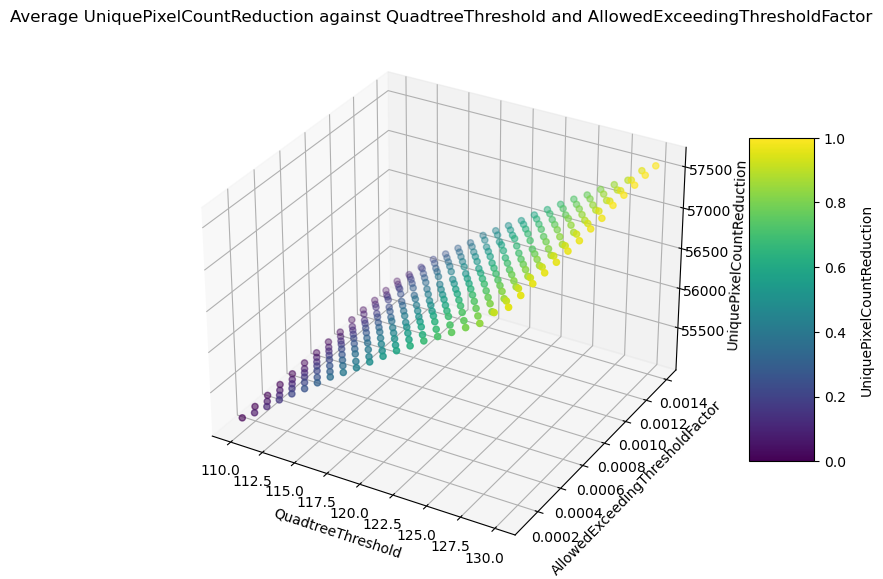

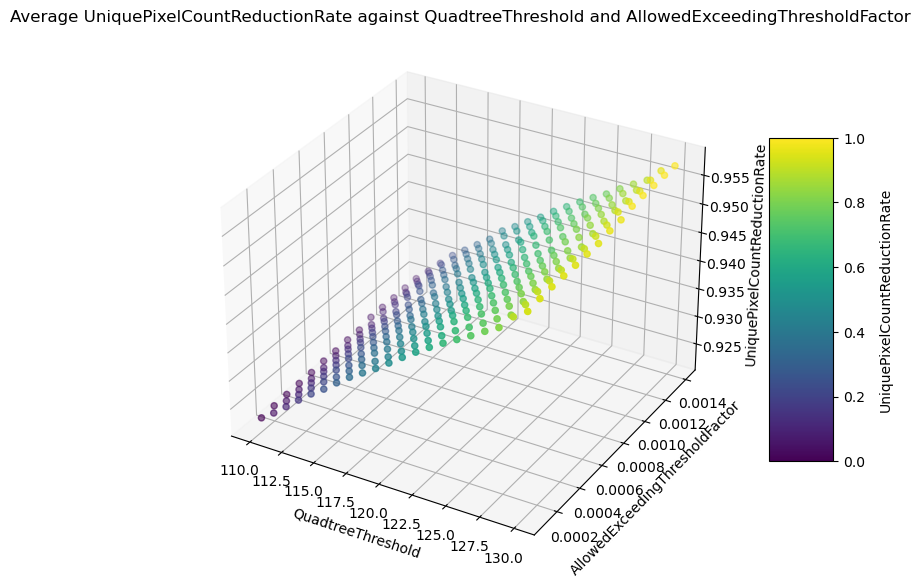

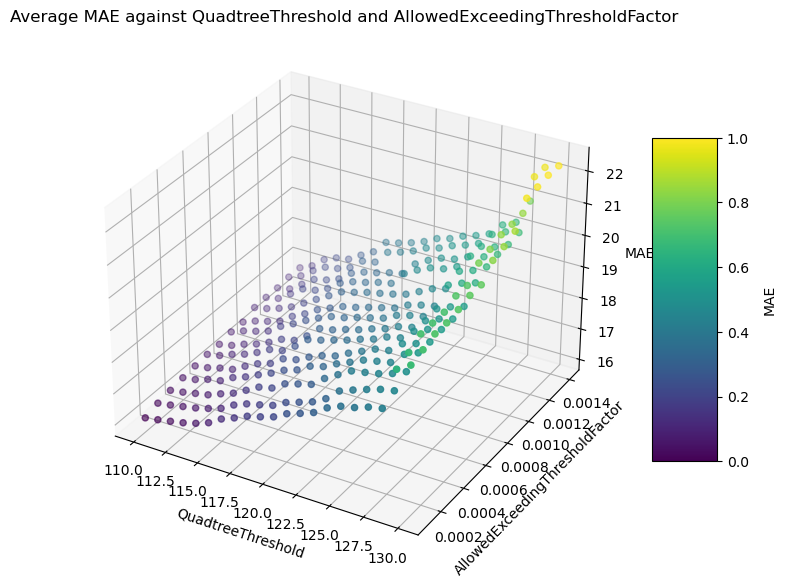

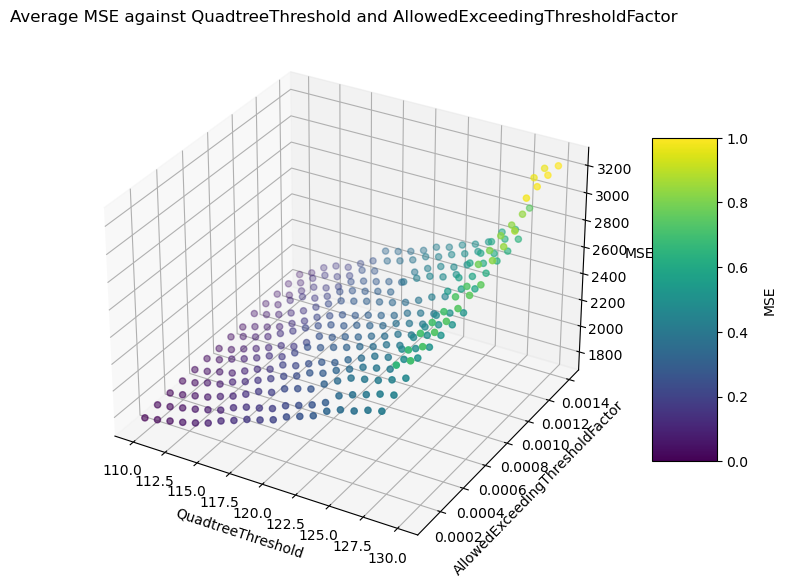

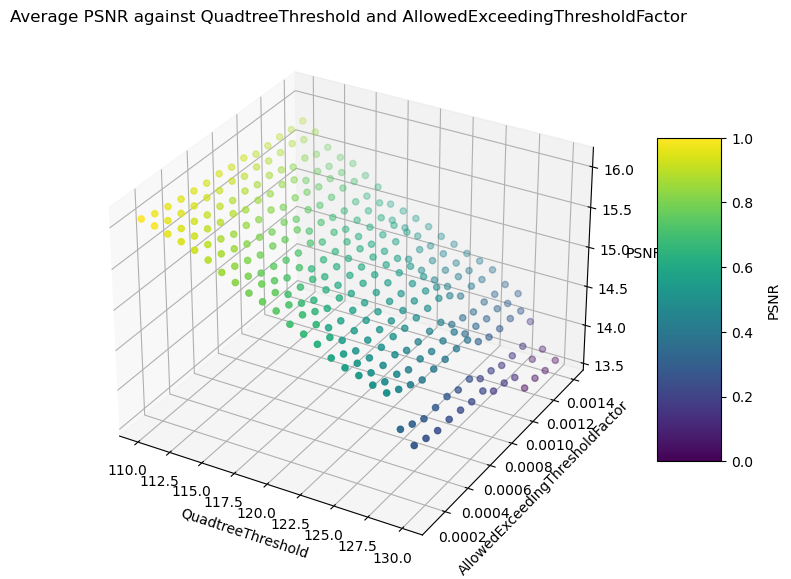

In [8]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


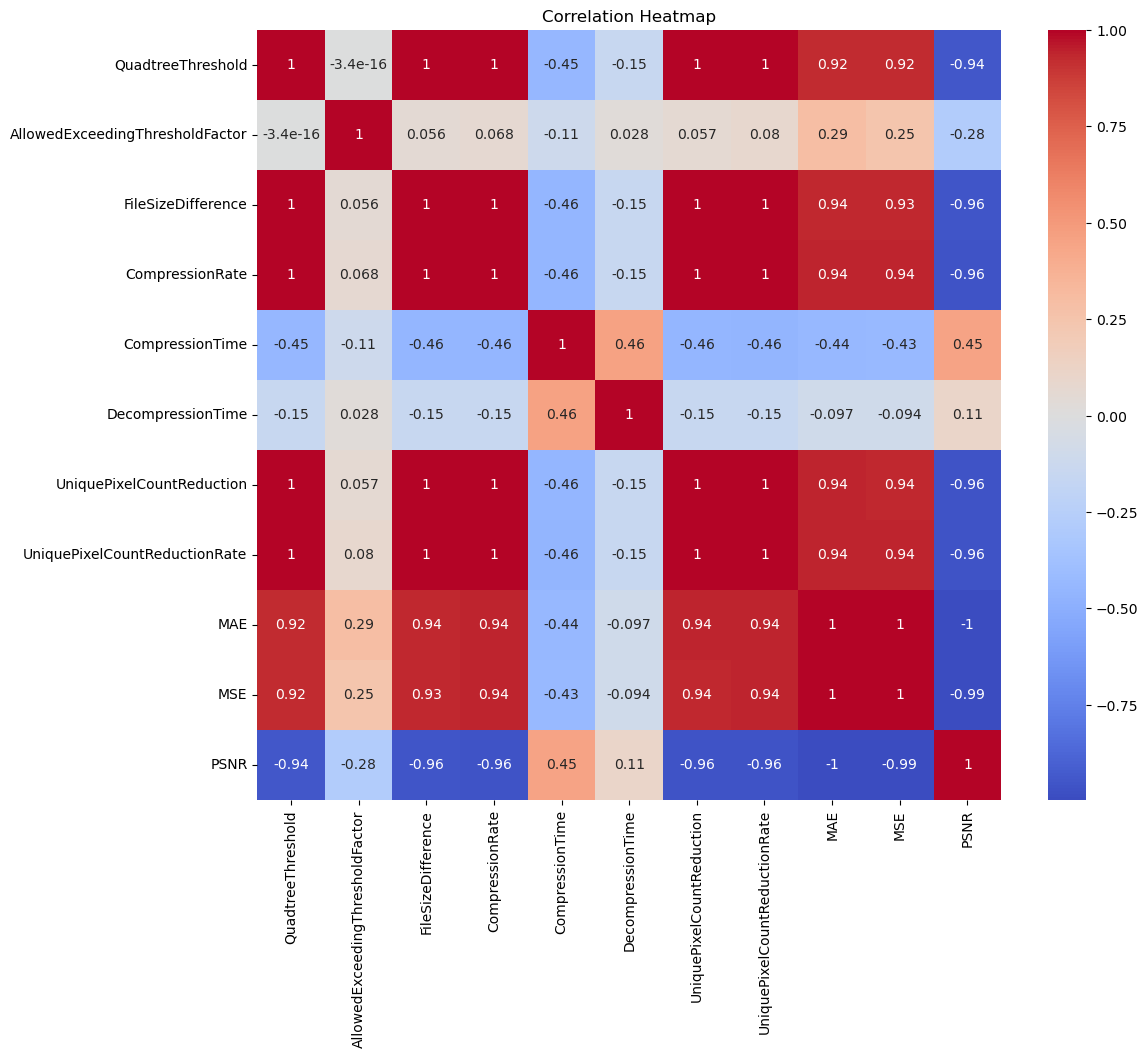

In [9]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [4]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

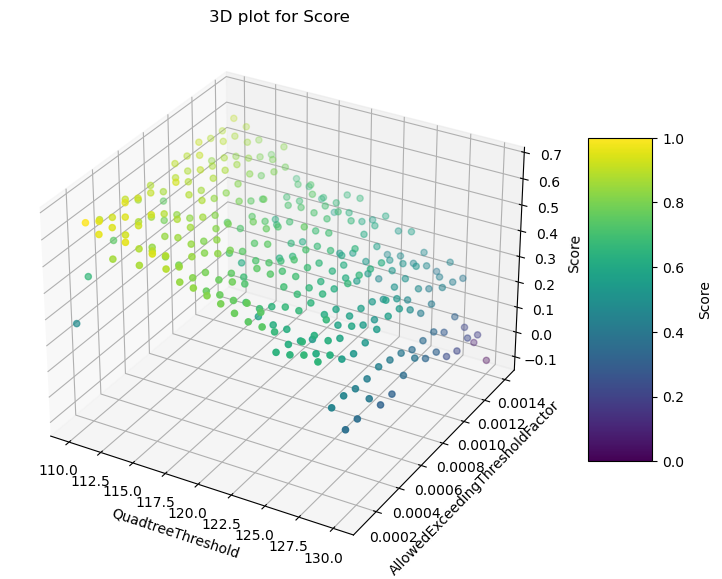

In [5]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

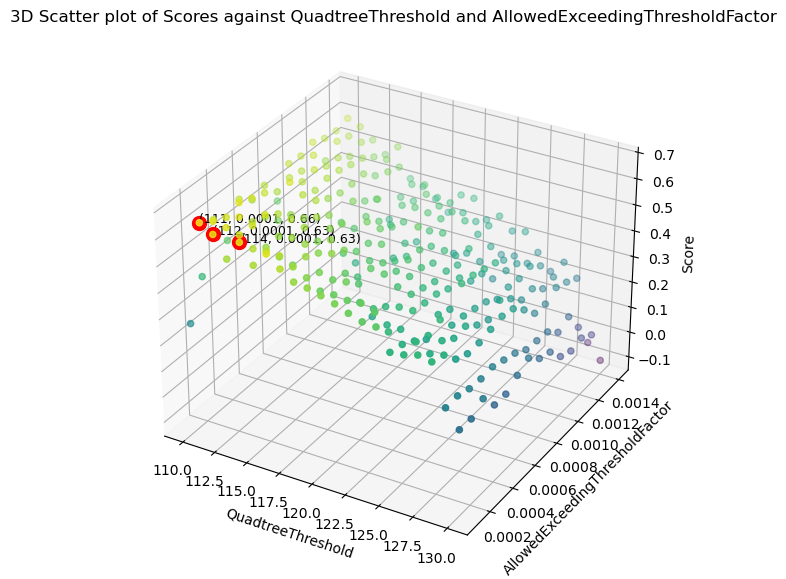

In [6]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [7]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
14                111                           0.0001  0.663321
28                112                           0.0001  0.634099
56                114                           0.0001  0.633215


In [8]:
previous_optimal_reading = data_grouped_by_test[(data_grouped_by_test['QuadtreeThreshold'] == 120) & (data_grouped_by_test['AllowedExceedingThresholdFactor'] == 0.001)]

print(previous_optimal_reading[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])

     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
149                120                            0.001  0.424326
